Kullanılacak kütüphaneler ekleniyor.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Veri seti ekleniyor. Bağımsız ve bağımlı değişkenler ayrılıyor.

In [19]:
dataset = pd.read_csv("telefon_fiyatlari.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Veriler train ve test verilerine ayrılıyor(%80-%20)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=1);

Veriler için normalizasyon yapılıyor.

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

K-NN yani K-en yakın komşu modeli ekleniyor.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier();

SVM in kernellarından birisi olan rbf ekleniyor.

In [23]:
from sklearn.svm import SVC
RBF_model = SVC(kernel = 'rbf')

Karar ağaçlarının bir araya gelerek oluşturduğu Random Forest modeli ekleniyor.

In [24]:
from sklearn.ensemble import RandomForestClassifier
RForest_model = RandomForestClassifier()

Karar Ağaçları modeli ekleniyor.

In [25]:
from sklearn.tree import DecisionTreeClassifier
DTree_model = DecisionTreeClassifier()

Her model için denenecek parametre değerleri Grid Search'de kullanılması için değişkenlere atılıyor. GridSearchCV ile modeller ve parametreler bir araya getirilip fit ediliyor. Aralarından en yüksek accuracy skoruna sahip model, best model seçiliyor.

In [26]:
from sklearn.model_selection import GridSearchCV

KNN_param_grid = {'n_neighbors': [3, 5, 7, 10, 15], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
RBF_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}
RForest_param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
DTree_param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4]}

KNN_grid_search = GridSearchCV(KNN_model, KNN_param_grid, cv=5)
RBF_grid_search = GridSearchCV(RBF_model, RBF_param_grid, cv=5)
RForest_grid_search = GridSearchCV(RForest_model,RForest_param_grid, cv=5)
DTree_grid_search = GridSearchCV(DTree_model, DTree_param_grid, cv=5)

KNN_grid_search.fit(x_train, y_train)
RBF_grid_search.fit(x_train, y_train)
RForest_grid_search.fit(x_train, y_train)
DTree_grid_search.fit(x_train, y_train)

KNN_accuracy = KNN_grid_search.best_score_
RBF_accuracy = RBF_grid_search.best_score_
RForest_accuracy = RForest_grid_search.best_score_
DTree_accuracy = DTree_grid_search.best_score_


best_accuracy = max(KNN_accuracy, RBF_accuracy, RForest_accuracy, DTree_accuracy)

if best_accuracy == KNN_accuracy:
    best_model = KNN_grid_search.best_estimator_
    best_params = KNN_grid_search.best_params_
elif best_accuracy == RBF_accuracy:
    best_model = RBF_grid_search.best_estimator_
    best_params = RBF_grid_search.best_params_
elif best_accuracy == RForest_accuracy:
    best_model = RForest_grid_search.best_estimator_
    best_params = RForest_grid_search.best_params_
else:
    best_model = DTree_grid_search.best_estimator_
    best_params = DTree_grid_search.best_params_

print("En iyi model:", best_model)
print("En iyi parametreler:", best_params)
print("En yüksek doğruluk:", best_accuracy)

En iyi model: SVC(C=10, gamma=0.01)
En iyi parametreler: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
En yüksek doğruluk: 0.914375


Modeller doğruluk oranlarına göre grafikte yer alıyor.

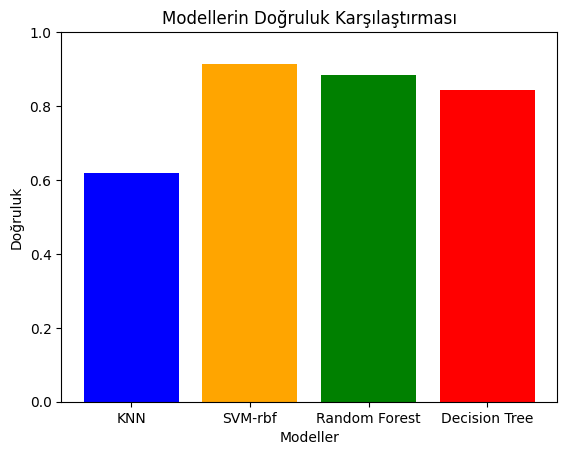

In [27]:
models = [KNN_accuracy,RBF_accuracy,RForest_accuracy,DTree_accuracy]
model_names = ['KNN', 'SVM-rbf', 'Random Forest', 'Decision Tree']

plt.bar(model_names, models, color=['blue', 'orange', 'green', 'red'])
plt.title('Modellerin Doğruluk Karşılaştırması')
plt.xlabel('Modeller')
plt.ylabel('Doğruluk')
plt.ylim(0, 1)
plt.show()

En iyi modelinin çeşitli sınıflandırma metrikleri yazdırılıyor.

In [28]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(x_test)

print(f"{best_model} Modeli Sınıflandırma Metrikleri:")
print(classification_report(y_test, y_pred))


SVC(C=10, gamma=0.01) Modeli Sınıflandırma Metrikleri:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        92
           1       0.91      0.93      0.92        96
           2       0.90      0.93      0.92       106
           3       0.99      0.92      0.95       106

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



En iyi modeli için Headmap'te karmaşıklık matrisi yer alıyor.

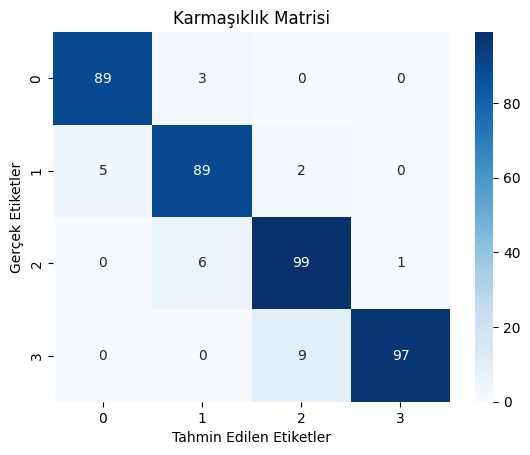

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Karmaşıklık Matrisi")
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.show()

Telefon fiyat seviyesinin RAM miktarına göre dağılım grafiği yer alıyor.

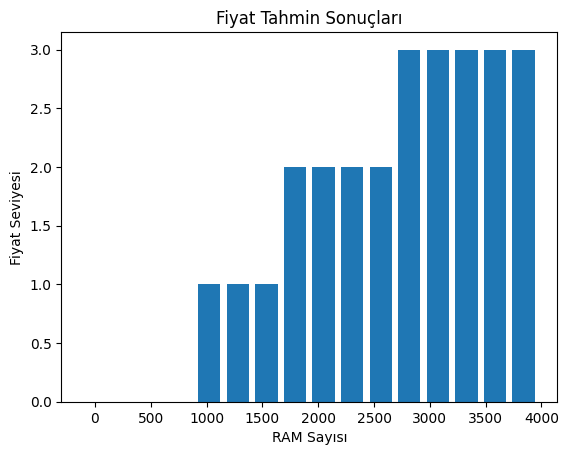

In [30]:
ram_data1 = np.array([1815, 0, 2.8, 0, 2, 0, 33, 0.6, 159, 4, 17, 607, 748, 0, 18, 0, 2, 1, 0, 0])
ram_values = []
pred_values = []

for i in range(16):
    ram_data1[13] += 256
    scaled_ram_data1 = ss.transform([ram_data1])
    y_pred = best_model.predict(scaled_ram_data1)
    ram_values.append(ram_data1[13])
    pred_values.append(y_pred[0])

ram_values = [256 * i for i in range(16)]

plt.bar(ram_values, pred_values, width=200)
plt.title('Fiyat Tahmin Sonuçları')
plt.xlabel('RAM Sayısı')
plt.ylabel('Fiyat Seviyesi')
plt.show()

Telefon fiyat seviyesinin RAM miktarına ve işlemcinin çekirdek sayısına göre dağılım grafiği yer alıyor.

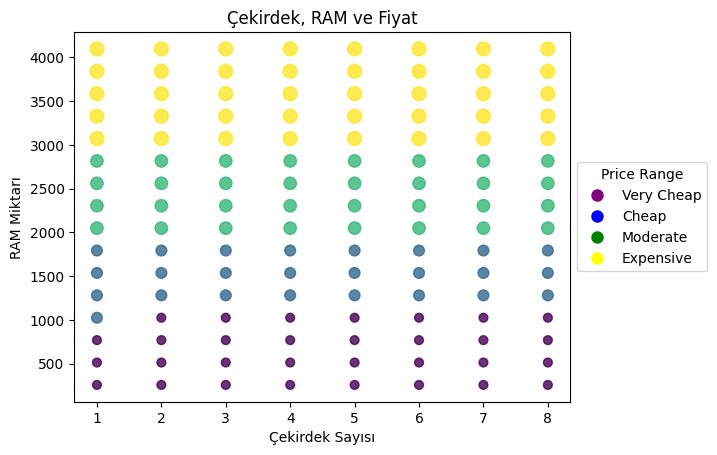

In [31]:
cores_ram_data1 = np.array([1815, 0, 2.8, 0, 2, 0, 33, 0.6, 159, 4, 17, 607, 748, 0, 18, 0, 2, 1, 0, 0])
cores_values = []
ram_values = []
pred_values = []
area_values = []

categories = ['Very Cheap', 'Cheap', 'Moderate', 'Expensive']
colors = ['purple', 'blue', 'green', 'yellow']

for i in range(16):
    cores_ram_data1[13] += 256
    for j in range(8):
        cores_ram_data1[9] = j + 1
        scaled_cores_ram_data1 = ss.transform([cores_ram_data1])
        y_pred = best_model.predict(scaled_cores_ram_data1)
        cores_values.append(cores_ram_data1[9])
        ram_values.append(cores_ram_data1[13])
        pred_values.append(y_pred[0])
        area_values.append(y_pred[0]*20+40)

scatter = plt.scatter(cores_values, ram_values, c=pred_values, cmap='viridis', s=area_values, alpha=0.8)

legend_labels = {category: color for category, color in zip(categories, colors)}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                             markerfacecolor=color, markersize=10) for label, color in legend_labels.items()]
plt.legend(handles=legend_handles, title='Price Range', loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('Çekirdek, RAM ve Fiyat')
plt.xlabel('Çekirdek Sayısı')
plt.ylabel('RAM Miktarı')

plt.show()